# 🎵Importaciones

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn import	tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

# ✏Plots

## 🎶Carga de datos

In [2]:
#usamos pandas para cargar y limpiar el dataset de valores vacios
wine_df = pd.read_csv("wine_data.csv").dropna()

## 📈Grafico de calidad

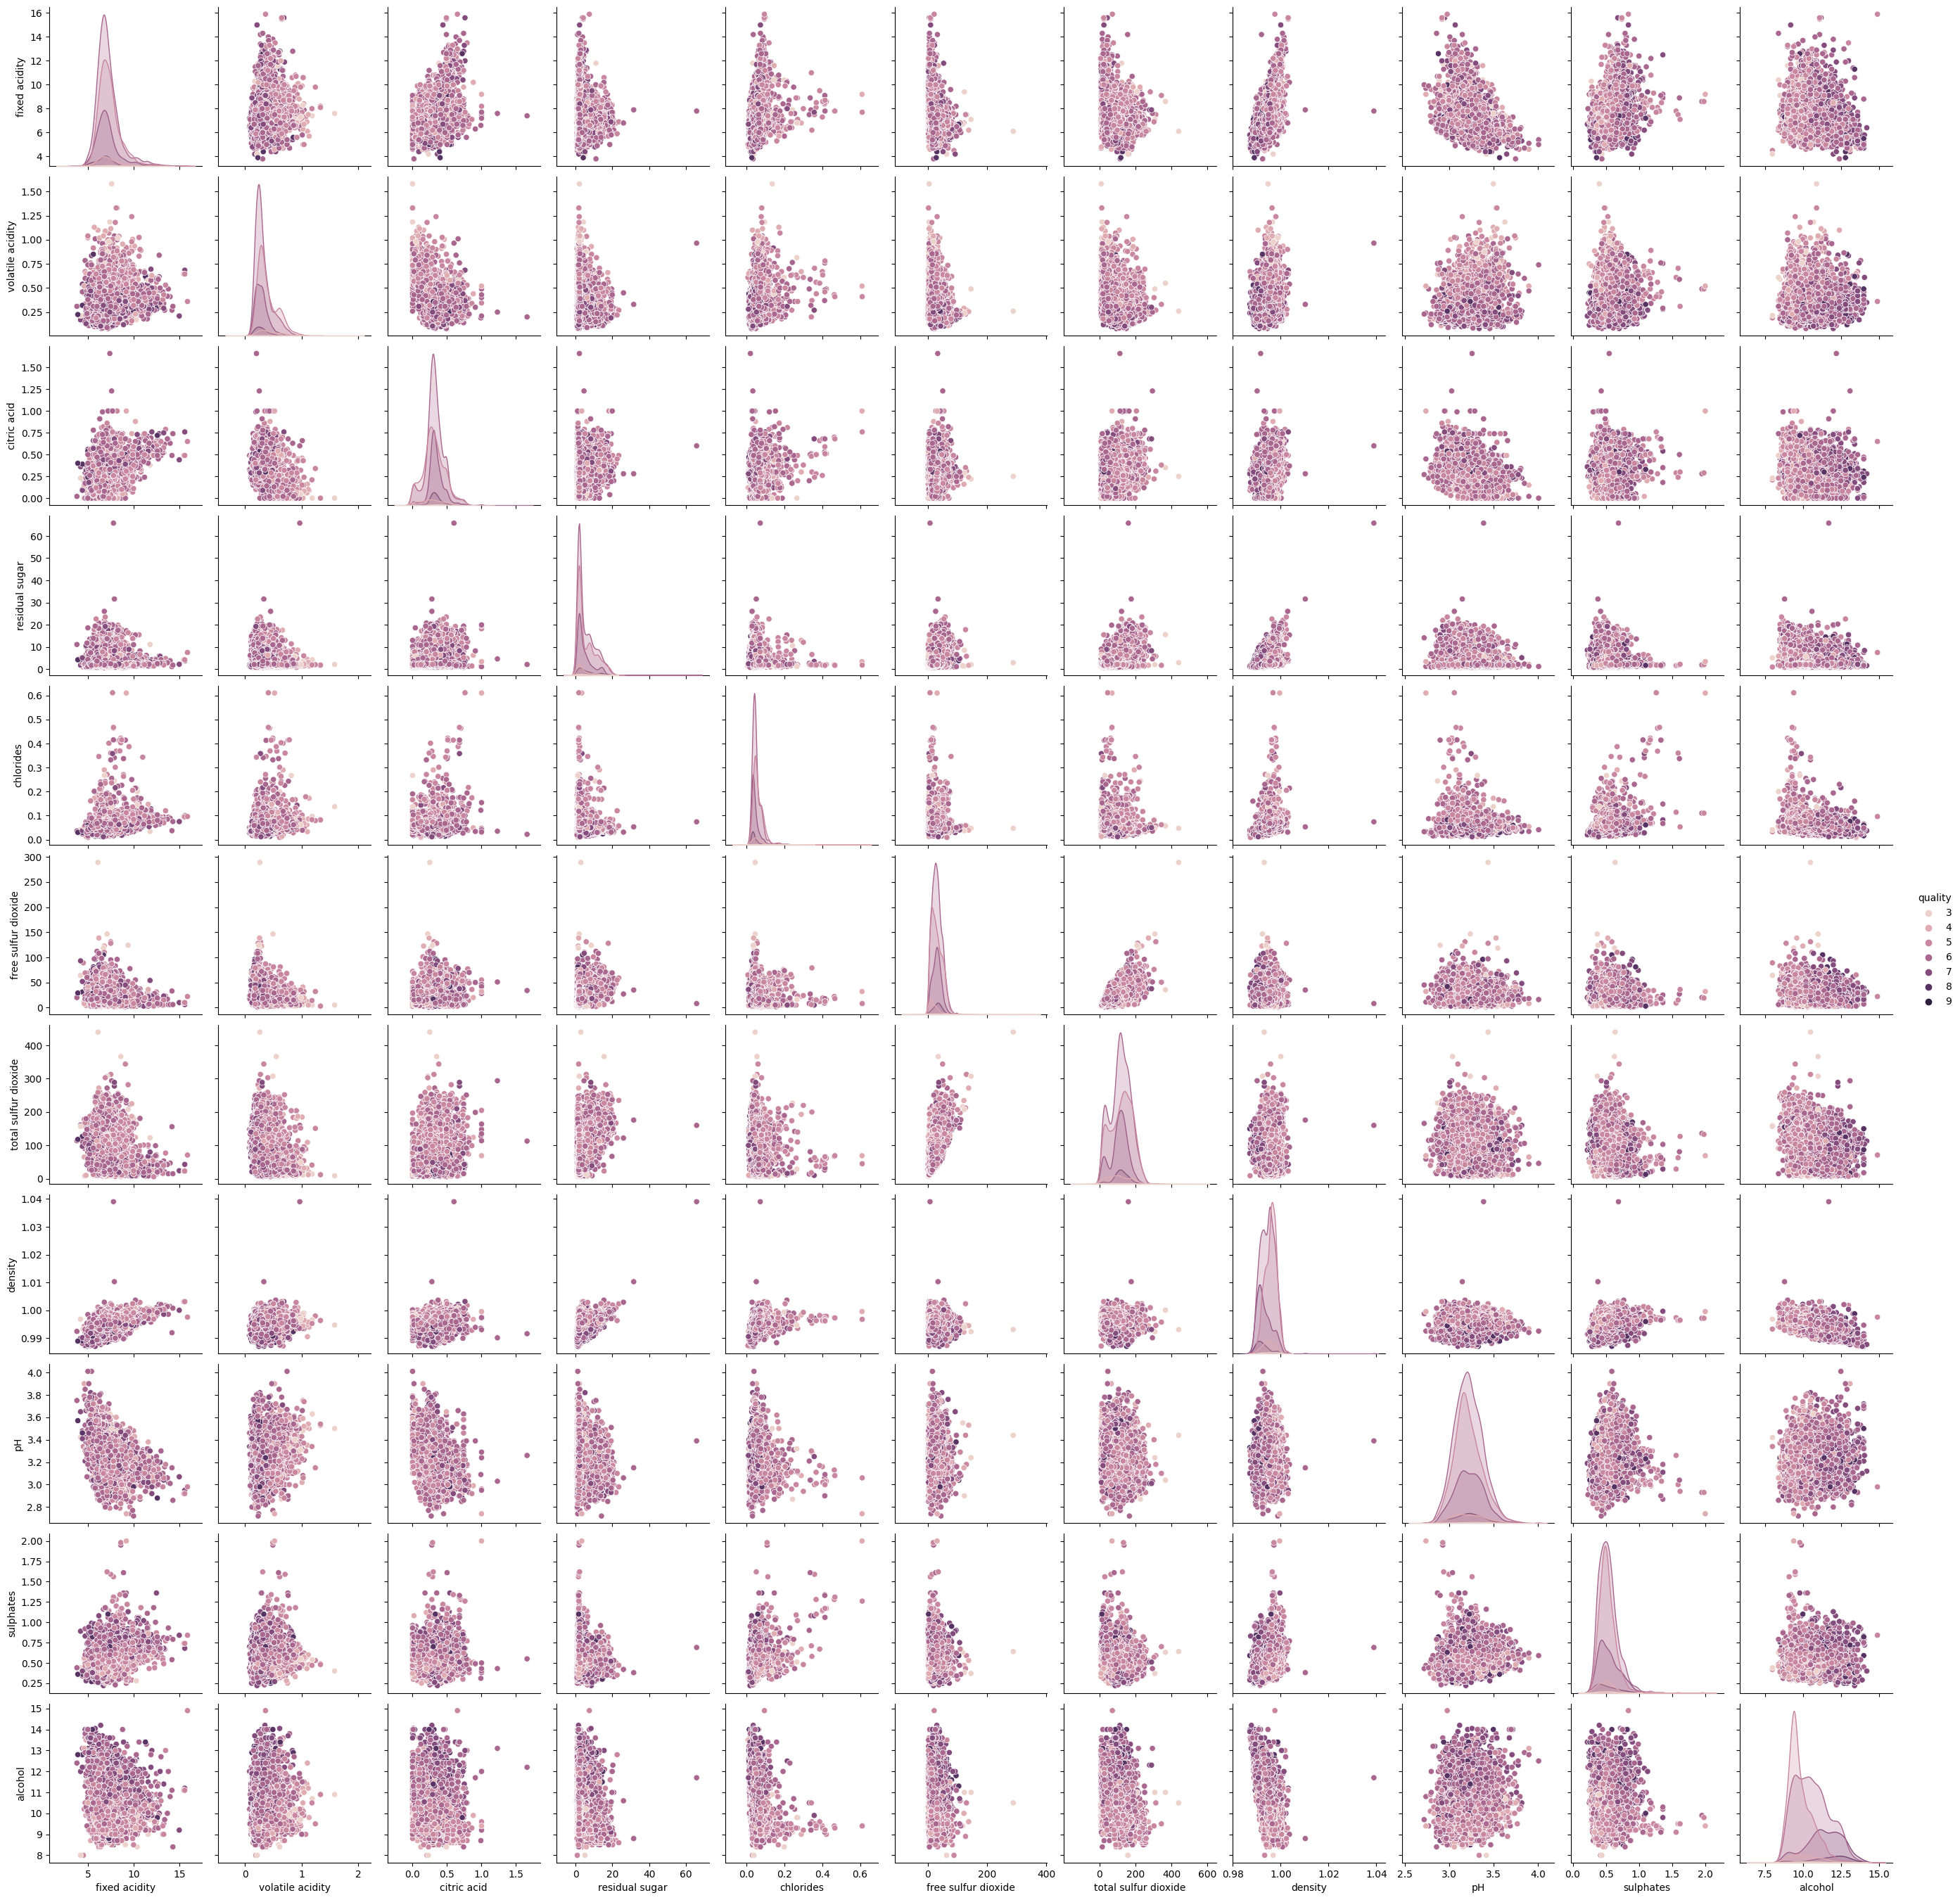

In [3]:
sns.pairplot(wine_df, hue="quality")

## 📊Grafico de tipo

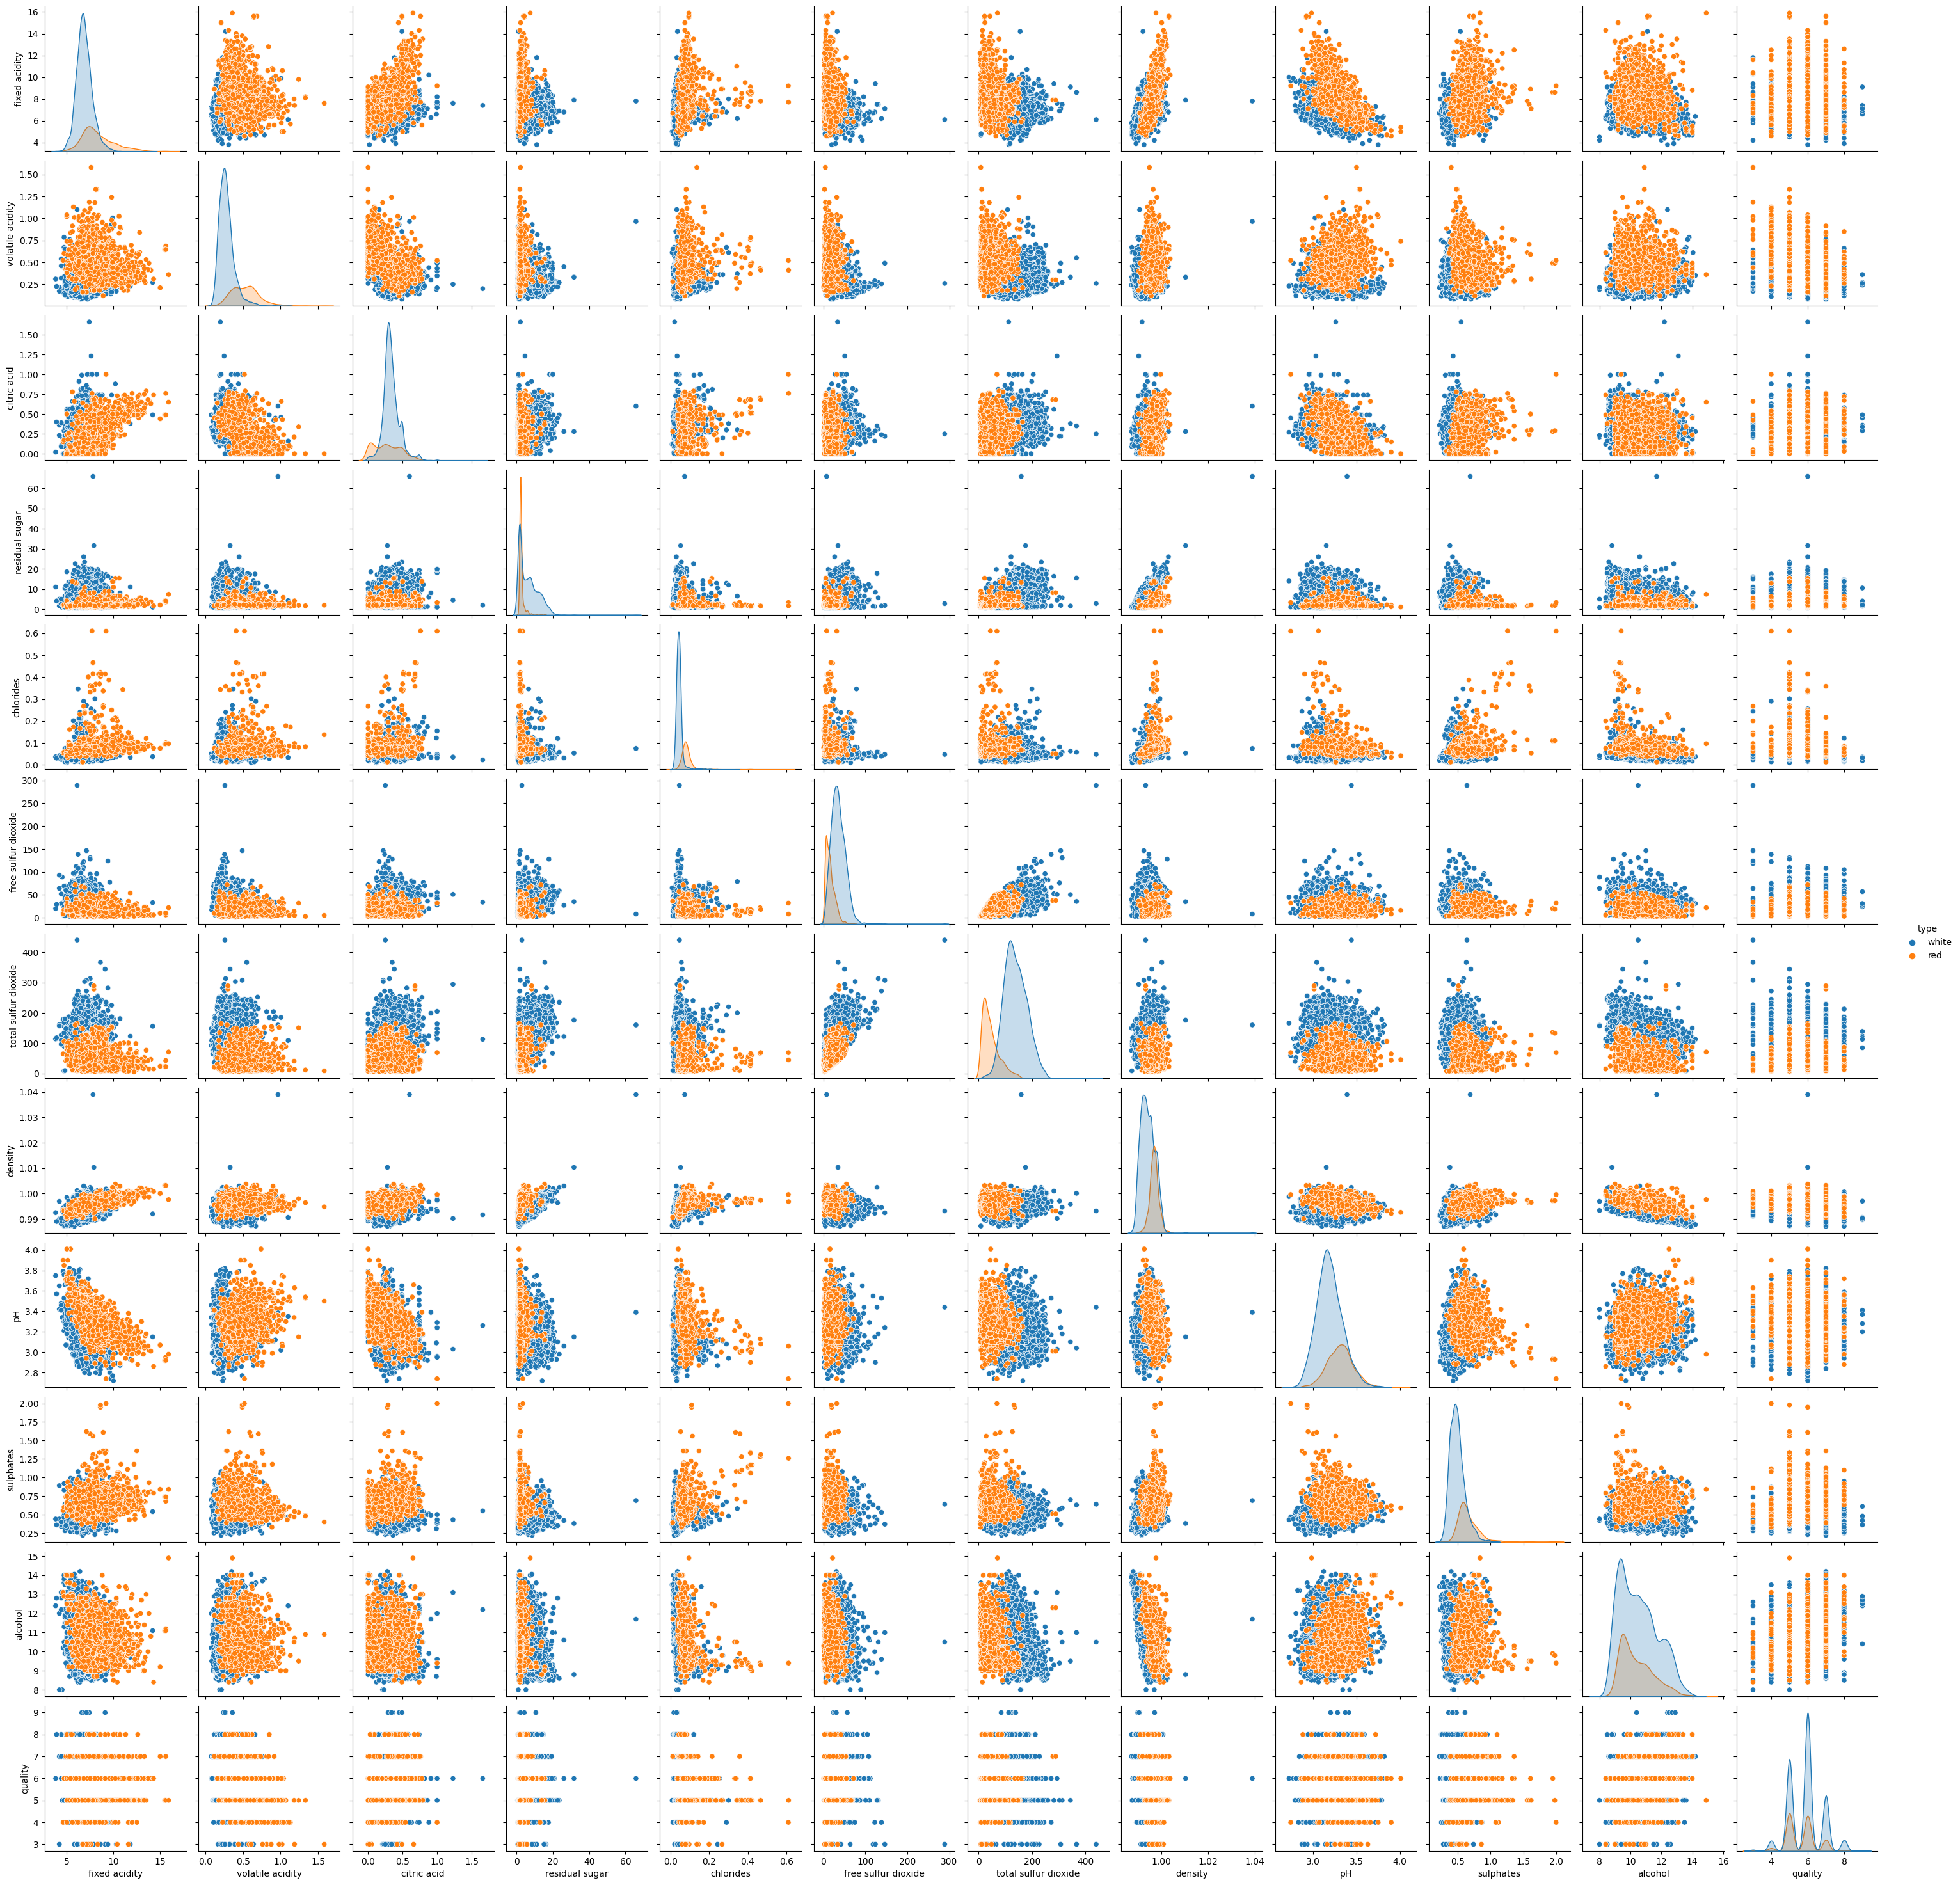

In [4]:
sns.pairplot(wine_df, hue="type")

## 🌟Conclusión de graficos

Observamos el DataSet con dos graficos de tipo pairplot que nos permiten comparar todas las columnas del mismo entre sí. Esto nos permite un mejor análisis del DataSet al tener una visión de los datos de a pares; para cada columna del DataSet hay un grafico que lo compara con otra o con si misma, dando como resultado en esta ultima situación un grafico con los datos en eje X y la cantidad de veces que se repite en el Y. Por otro lado, los graficos se diferencian por el tipo de dato seleccionado para diferenciar los valores en los mismos por medio del color (el valor "hue"). En el primero es la calidad y el segundo el tipo de vino.

En conclución podemos observar como, para cada uno de los dos datos seleccionados (calidad y tipo) se relaccionan todos los datos, permitiendonos un mejor entendimiento del modelo a crear (por ejemplo si convendria algo como K-Neigbours o un Decision Tree) y como crearlo, modificando sus hiperparámetros en caso de necesitarlo.

# 🔬Comparación cross-val

## 🟢K-Fold

Divide el conjunto de datos en K subconjuntos iguales y realiza K experimentos, dejando un subconjunto diferente para la validación en cada caso. Es especialmente útil cuando se trabaja con conjuntos de datos grandes porque se entrena un número limitado de modelos (K). Esta limitación en el número de modelos hace que sea una opción más rápida y menos costosa computacionalmente que otras técnicas de validación cruzada, especialmente para conjuntos de datos grandes.

## 🟢Leave one out

Por otro lado, Leave-One-Out (LOO) es un caso extremo de K-Fold donde cada muestra en el conjunto de datos se deja fuera una vez. Esto significa que si tenemos n muestras, realizaríamos N iteraciones, entrenando el modelo en N-1 muestras y probándolo en la que se dejó fuera. Aunque este método puede dar una estimación menos sesgada del rendimiento del modelo, es computacionalmente costoso. Imagina tener que entrenar un modelo complejo miles de veces (cada vez con casi todas las muestras). Esto lo convierte en una peor opción para conjuntos de datos grandes.

## 🟢Leave p out

Leave-P-Out lleva la idea de LOO un paso más allá al considerar todos los subconjuntos posibles de P muestras como conjuntos de prueba. El número de modelos entrenados en este enfoque es igual a las combinaciones de N elementos tomados P a la vez, lo cual puede ser extremadamente grande y, por lo tanto, este método es computacionalmente muy costoso. Sin embargo, puede ser útil en situaciones donde se necesita una validación muy rigurosa y se dispone de suficientes recursos computacionales.

## 🧪Comparación

Si estás buscando una técnica que sea eficiente en tiempo y recursos, K-Fold suele ser la mejor opción. Si tu conjunto de datos es chico y necesitas una evaluación más precisa a cambio de más tiempo de cómputo, Leave-One-Out podría ser más adecuado. Leave-P-Out generalmente se reserva para casos especiales donde se requiere un nivel de rigor extremadamente alto y se dispone de recursos computacionales suficientes para manejar el alto costo computacional.

# 🔴Modelos de clasificación

## 🎶Carga de datos

In [5]:
#Separamos el dataset 

# x = features (exluyendo la columna que intentamos predecir "type") input 
X = wine_df.drop("type", axis=1)

#y = label (incluyendo solo la columna type) output
y = wine_df["type"]

#definimos que el 20% de los datos sean para probar el modelo y 80% para entrenarlo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 🔵Decision Tree Classifier

### 🤖Modelo

Creamos y entrenamos nuestro modelo:

In [6]:
#aca creamos un arbol de decision,definimos la profundidad maxima y la canidad de muestras minima
model = tree.DecisionTreeClassifier(max_depth=8, min_samples_leaf=5)

#entrenamos el modelo usando los datos de entrenamiento que establecimos antes 20% 80%
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=5)

### 🎯Output

Hora de ver que tan preciso es nuestro modelo!:

Precision: 97.83449342614075%
Cross-val Score: 0.9809688767673373


[Text(0.4765625, 0.9444444444444444, 'X[4] <= 0.061\ngini = 0.37\nsamples = 5170\nvalue = [1265, 3905]'),
 Text(0.22395833333333334, 0.8333333333333334, 'X[6] <= 54.0\ngini = 0.068\nsamples = 3761\nvalue = [132, 3629]'),
 Text(0.08333333333333333, 0.7222222222222222, 'X[4] <= 0.038\ngini = 0.421\nsamples = 143\nvalue = [100, 43]'),
 Text(0.041666666666666664, 0.6111111111111112, 'X[9] <= 0.625\ngini = 0.108\nsamples = 35\nvalue = [2, 33]'),
 Text(0.020833333333333332, 0.5, 'gini = 0.0\nsamples = 30\nvalue = [0, 30]'),
 Text(0.0625, 0.5, 'gini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.125, 0.6111111111111112, 'X[9] <= 0.395\ngini = 0.168\nsamples = 108\nvalue = [98, 10]'),
 Text(0.10416666666666667, 0.5, 'gini = 0.346\nsamples = 9\nvalue = [2, 7]'),
 Text(0.14583333333333334, 0.5, 'X[3] <= 4.5\ngini = 0.059\nsamples = 99\nvalue = [96, 3]'),
 Text(0.125, 0.3888888888888889, 'X[7] <= 0.992\ngini = 0.021\nsamples = 94\nvalue = [93, 1]'),
 Text(0.10416666666666667, 0.2777777777777778, 

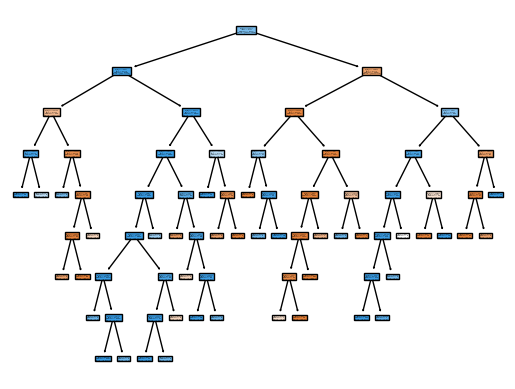

In [7]:
#probamos el modelo, predecimos el tipo de vino a base de los datos de prueba y almacenamos los resultados
y_pred = model.predict(X_test)

#printeamos el score de precision en formato sobre 100%
print("Precision: " + str(accuracy_score(y_test, y_pred) * 100) + "%")

#printeamos el score de cross-val score que usa validacion cruzada 3 veces para verificar cuan bueno es el modelo
print("Cross-val Score: " + str(sum(cross_val_score(model, X, y, cv=3))/3))

#crea un grafico de las diviciones del arbol
tree.plot_tree(model, filled=True)

El modelo fue bastante exitoso, con una precision de poco mas de 98%

### 🥇Bonus GridSearch

A traves del gridsearch intentamos averiguar el peso optimo de cada uno de los features (parametros) para mejorar el modelo haciendo una grid con los features y probando cada combinacion. 

In [8]:
# Hyperparametros
params = {
    "max_depth": [3, 4, 5, 6, 7],
    "min_samples_leaf": [1, 2, 3, 4, 5],
}

# Modelo
gs = GridSearchCV(
    estimator=tree.DecisionTreeClassifier(), param_grid=params, cv=5
)

# Entrenamiento del modelo
gs.fit(X_train, y_train)

# Mejores parametros
print(gs.best_params_)

# Se guarda el mejor modelo
best_gs = gs.best_estimator_

# Testeo del modelo
y_pred = best_gs.predict(X_test)

# Calculamos el puntaje de precision
accuracy = accuracy_score(y_test, y_pred)

# Mostramos el puntaje de precision
print(str(accuracy * 100) + "%")


{'max_depth': 7, 'min_samples_leaf': 1}
97.7571539056458%


### 🥇Bonus RandomSearch

RandomSearch, a diferencia de GridSearch no prueba todas las combinaciones, por lo tanto es mas rapido y eficiente pero no te asefura la misma presicion

In [9]:
# Hyperparametros
params = {
    "max_depth": [3, 4, 5, 6, 7],
    "min_samples_leaf": [1, 2, 3, 4, 5],
}

# Modelo
rs = RandomizedSearchCV(
    estimator=tree.DecisionTreeClassifier(), param_distributions=params, n_iter=10, cv=5
)

# Entrenamiento del modelo
rs.fit(X_train, y_train)

# Mejores parametros
print(rs.best_params_)

# Se guarda el mejor modelo
best_rs = rs.best_estimator_

# Testeo del modelo
y_pred = best_rs.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print(str(accuracy * 100) + "%")

{'min_samples_leaf': 1, 'max_depth': 6}
97.60247486465585%


## 🔵Logistic Regression

### 🤖Modelo

In [10]:
model = LogisticRegression()
model.fit(X_train, y_train)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### 🎯Output

In [11]:
y_pred = model.predict(X_test)
print("Precision: " + str(accuracy_score(y_test, y_pred) * 100) + "%")
print("Cross-val Score: " + str(sum(cross_val_score(model, X, y, cv=3))/3))

Precision: 98.06651198762569%
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

### 🥇Bonus GridSearch

In [12]:
# Hyperparametros
params = {
    "penalty": ['l1', 'l2', 'elasticnet', None],
    "solver": ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky'],
}

# Modelo
gs = GridSearchCV(
    estimator=LogisticRegression(), param_grid=params, cv=5
)

# Entrenamiento del modelo
gs.fit(X_train, y_train)

# Mejores parametros
print(gs.best_params_)

# Se guarda el mejor modelo
best_gs = gs.best_estimator_

# Testeo del modelo
y_pred = best_gs.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print(str(accuracy * 100) + "%")

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

### 🥇Bonus RandomSearch

In [13]:
# Hyperparametros
params = {
    "penalty": ['l1', 'l2', 'elasticnet', None],
    "solver": ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky'],
}

# Modelo
rs = RandomizedSearchCV(
    estimator=LogisticRegression(), param_distributions=params, n_iter=10, cv=5
)

# Entrenamiento del modelo
rs.fit(X_train, y_train)

# Mejores parametros
print(rs.best_params_)

# Se guarda el mejor modelo
best_rs = rs.best_estimator_

# Testeo del modelo
y_pred = best_rs.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print(str(accuracy * 100) + "%")

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

## 🔵Random Forest Classifier

### 🤖Modelo

In [14]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

### 🎯Output

In [15]:
y_pred = model.predict(X_test)
print("Precision: " + str(accuracy_score(y_test, y_pred) * 100) + "%")
print("Cross-val Score: " + str(sum(cross_val_score(model, X, y, cv=3))/3))

Precision: 99.1492652745553%
Cross-val Score: 0.9930372888512604


### 🥇Bonus GridSearch

In [16]:
# Hyperparametros
params = {
    "n_estimators": [10, 20, 30, 40, 50],
    "max_depth": [3, 4, 5, 6, 7],
    "min_samples_split": [2, 3, 4, 5, 6],
    "min_samples_leaf": [1, 2, 3, 4, 5],
}

# Modelo
gs = GridSearchCV(
    estimator=RandomForestClassifier(), param_grid=params, cv=5
)

# Entrenamiento del modelo
gs.fit(X_train, y_train)

# Mejores parametros
print(gs.best_params_)

# Se guarda el mejor modelo
best_gs = gs.best_estimator_

# Testeo del modelo
y_pred = best_gs.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print(str(accuracy * 100) + "%")

{'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 30}
99.1492652745553%


### 🥇Bonus RandomSearch

In [17]:
# Hyperparametros
params = {
    "n_estimators": [20, 50, 100],
    "max_depth": [3, 5, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5],
}

# Modelo
rs = RandomizedSearchCV(
    estimator=RandomForestClassifier(), param_distributions=params, n_iter=10, cv=5
)

# Entrenamiento del modelo
rs.fit(X_train, y_train)

# Mejores parametros
print(rs.best_params_)

# Se guarda el mejor modelo
best_rs = rs.best_estimator_

# Prediccion del nuevo modelo
y_pred = best_rs.predict(X_test)

# Testeo del modelo
print(str(accuracy_score(y_test, y_pred) * 100) + "%")

{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10}
99.07192575406032%


# 🔴Modelos de regresión

## 🎶Carga de datos

Aca volvemos a cargar los datos. Primero transformamos igual la columna de tipo a un valor numerico asi es procesable para los modelos regresivos. Despues declaramos a los features como todo excepto la columna "quality", que va a ser la de labels.

In [18]:
wine_df = pd.read_csv("wine_data.csv").dropna()
le = preprocessing.LabelEncoder()
wine_df["type"] = le.fit_transform(wine_df["type"])

X = wine_df.drop("quality", axis=1)
y = wine_df["quality"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 🔵Decision Tree Regressor

### 🤖Modelo

In [19]:
model = tree.DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

### 🎯Output

El output de estos modelos los vamos a mostrar a traves de un nuevo DataFrame comparativo, en donde en la columna de la izquierda se van a mostrar los resultados reales y en la de la derecha los predecidos

In [20]:
pred = model.predict(X_test)

df = pd.DataFrame()

df["Quality"] = y_test
df["QualityPred"] = pred

df

Quality  QualityPred
6281        5          5.0
3145        6          6.0
1046        5          6.0
5397        6          6.0
4866        6          6.0
...       ...          ...
4121        6          5.0
4870        7          6.0
5896        6          5.0
873         3          5.0
6018        8          7.0

[1293 rows x 2 columns]

### 🥇Bonus GridSearch

In [21]:
# Hyperparametros
params = {
    "max_depth": [3, 4, 5, 6, 7],
    "min_samples_split": [2, 3, 4, 5, 6],
}

# Modelo
gs = GridSearchCV(
    estimator=tree.DecisionTreeRegressor(), param_grid=params, cv=5
)

# Entrenamiento del modelo
gs.fit(X_train, y_train)

# Mejores parametros
print(gs.best_params_)

# Se guarda el mejor modelo
best_gs = gs.best_estimator_

# Testeo del modelo
y_pred = best_gs.predict(X_test)

df = pd.DataFrame()

df["Quality"] = y_test
df["QualityPred"] = y_pred

df

{'max_depth': 5, 'min_samples_split': 6}


Quality  QualityPred
6281        5     5.292994
3145        6     5.667151
1046        5     5.822222
5397        6     6.473684
4866        6     6.255162
...       ...          ...
4121        6     5.667151
4870        7     6.255162
5896        6     4.934010
873         3     5.822222
6018        8     6.242574

[1293 rows x 2 columns]

### 🥇Bonus RandomSearch

In [22]:
# Hyperparametros
params = {
    "max_depth": [3, 4, 5, 6, 7],
    "min_samples_split": [2, 3, 4, 5, 6],
}

# Modelo
rs = RandomizedSearchCV(
    estimator=tree.DecisionTreeRegressor(), param_distributions=params,n_iter=10, cv=5
)

# Entrenamiento del modelo
rs.fit(X_train, y_train)

# Mejores parametros
print(rs.best_params_)

# Se guarda el mejor modelo
best_rs = rs.best_estimator_

# Testeo del modelo
y_pred = best_rs.predict(X_test)

df = pd.DataFrame()

df["Quality"] = y_test
df["QualityPred"] = y_pred

df

{'min_samples_split': 6, 'max_depth': 5}


Quality  QualityPred
6281        5     5.292994
3145        6     5.667151
1046        5     5.822222
5397        6     6.473684
4866        6     6.255162
...       ...          ...
4121        6     5.667151
4870        7     6.255162
5896        6     4.934010
873         3     5.822222
6018        8     6.242574

[1293 rows x 2 columns]

## 🔵Linear Regression

### 🤖Modelo

In [23]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### 🎯Output

In [24]:
pred = model.predict(X_test)

df = pd.DataFrame()

df["Quality"] = y_test
df["QualityPred"] = pred

df

Quality  QualityPred
6281        5     5.285668
3145        6     5.608917
1046        5     5.595539
5397        6     5.357417
4866        6     5.827294
...       ...          ...
4121        6     5.944809
4870        7     6.081536
5896        6     4.793194
873         3     5.555317
6018        8     6.632777

[1293 rows x 2 columns]

### 🥇Bonus GridSearch

In [25]:
# Hyperparametros
params = {
    "positive": [True, False],
}

# Modelo
gs = GridSearchCV(
    estimator=LinearRegression(), param_grid=params, cv=5
)

# Entrenamiento del modelo
gs.fit(X_train, y_train)

# Mejores parametros
print(gs.best_params_)

# Se guarda el mejor modelo
best_gs = gs.best_estimator_

# Testeo del modelo
y_pred = best_gs.predict(X_test)

df = pd.DataFrame()

df["Quality"] = y_test
df["QualityPred"] = y_pred

df

{'positive': False}


Quality  QualityPred
6281        5     5.285668
3145        6     5.608917
1046        5     5.595539
5397        6     5.357417
4866        6     5.827294
...       ...          ...
4121        6     5.944809
4870        7     6.081536
5896        6     4.793194
873         3     5.555317
6018        8     6.632777

[1293 rows x 2 columns]

### 🥇Bonus RandomSearch

In [26]:
# Hyperparametros
params = {
    "positive": [True, False],
}

# Modelo
rs = RandomizedSearchCV(
    estimator=LinearRegression(), param_distributions=params, n_iter=10, cv=5
)

# Entrenamiento del modelo
rs.fit(X_train, y_train)

# Mejores parametros
print(rs.best_params_)

# Se guarda el mejor modelo
best_rs = rs.best_estimator_

# Testeo del modelo
y_pred = best_rs.predict(X_test)

df = pd.DataFrame()

df["Quality"] = y_test
df["QualityPred"] = y_pred

df

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
{'positive': False}


Quality  QualityPred
6281        5     5.285668
3145        6     5.608917
1046        5     5.595539
5397        6     5.357417
4866        6     5.827294
...       ...          ...
4121        6     5.944809
4870        7     6.081536
5896        6     4.793194
873         3     5.555317
6018        8     6.632777

[1293 rows x 2 columns]

# ✨Conclusion final

En conclusion, podemos darnos cuenta que a traves de varios valores quimicos y su nivel de calidad se puede determinar con mucha precision (alrededor de 98%) cosas como el tipo de vino. Ademas, pudimos intentar de usar modelos de regresion para aproximar la calidad de un vino con su tipo y sus valores quimicos con un margen de error bajo.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=60724e97-fd8f-4994-92cc-d47f9b753442' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>